In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-product-datalaptops/Flipkart-Laptops.xlsx


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
import spacy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data = pd.read_excel("/kaggle/input/flipkart-product-datalaptops/Flipkart-Laptops.xlsx")

In [4]:
data.head()

,Product Name,ProductID,Product image,Actual price,Discount price,Stars,Rating,Reviews,Description,Link
0,MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...,COMGZW35W3DSJADN,NaN,89990,54990,3.9,7 Ratings,1 Reviews,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,https://www.flipkart.com/msi-cyborg-15-intel-c...
1,MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...,COMGZW37ZX66DBHF,NaN,83990,67990,NIL,NIL,NIL,Intel Core i7 Processor (12th Gen)8 GB DDR4 RA...,https://www.flipkart.com/msi-thin-15-intel-cor...
2,DELL Inspiron 3520 Intel Core i3 12th Gen 1215...,COMGJ75HJGFDJ6JN,NaN,49240,35660,4.2,"1,805 Ratings",143 Reviews,Intel Core i3 Processor (12th Gen)8 GB DDR4 RA...,https://www.flipkart.com/dell-inspiron-3520-in...
3,Acer One (2024) Intel Core i3 11th Gen 1115G4 ...,COMGPF5CQ7VDWDT4,NaN,43999,26990,4.2,"6,977 Ratings",596 Reviews,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,https://www.flipkart.com/acer-one-2024-intel-c...
4,Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...,COMGPYKZAWY8UX6C,NaN,59400,27989,4.2,"1,263 Ratings",113 Reviews,AMD Ryzen 3 Quad Core Processor8 GB LPDDR5 RAM...,https://www.flipkart.com/lenovo-v15-amd-ryzen-...


In [5]:
data.describe

<bound method NDFrame.describe of                                           Product Name         ProductID  \
0    MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...  COMGZW35W3DSJADN   
1    MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...  COMGZW37ZX66DBHF   
2    DELL Inspiron 3520 Intel Core i3 12th Gen 1215...  COMGJ75HJGFDJ6JN   
3    Acer One (2024) Intel Core i3 11th Gen 1115G4 ...  COMGPF5CQ7VDWDT4   
4    Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...  COMGPYKZAWY8UX6C   
..                                                 ...               ...   
955  Acer Swift Go 14 (2024) AI Powered EVO Intel C...  COMGWKF2VKGAVHDU   
956  HP Victus Intel Core i5 12th Gen 12450H - (16 ...  COMH2DYZHMHZ5UPG   
957  Infinix X1 Slim Series (2024) Intel Core i3 10...  COMGEHP5EFEGWZW5   
958  Lenovo IdeaPad Slim 3 Intel Core i5 12th Gen 1...  COMGYHP5ZB4AGZH6   
959  HP (15s-fq5007TU) Intel Core i3 12th Gen 1215U...  COMGYHP5MCEYZHSV   

     Product image Actual price Discount price Stars 

In [6]:
data.shape

(960, 10)

In [7]:
data.isnull().any()

Product Name      False
ProductID         False
Product image      True
Actual price      False
Discount price    False
Stars             False
Rating            False
Reviews           False
Description       False
Link              False
dtype: bool

In [8]:
data.isnull().sum()

Product Name        0
ProductID           0
Product image     960
Actual price        0
Discount price      0
Stars               0
Rating              0
Reviews             0
Description         0
Link                0
dtype: int64

In [9]:
#there are 960 rows in dataset and product image column has null values in 960 rows
#which means it can be deleted

In [10]:
data=data.drop("Product image",axis =1)

In [11]:
data.isna().sum()

Product Name      0
ProductID         0
Actual price      0
Discount price    0
Stars             0
Rating            0
Reviews           0
Description       0
Link              0
dtype: int64

# **Visualizations**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


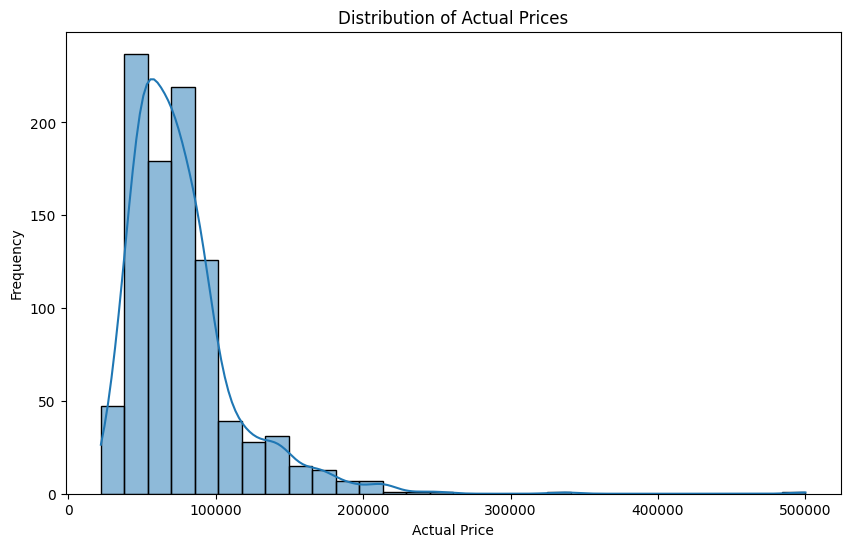

In [12]:
data['Actual price'] = pd.to_numeric(data['Actual price'], errors='coerce')
data['Discount price'] = pd.to_numeric(data['Discount price'], errors='coerce')

# Histogram for Actual Price
plt.figure(figsize=(10, 6))
sns.histplot(data['Actual price'], kde=True, bins=30)
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


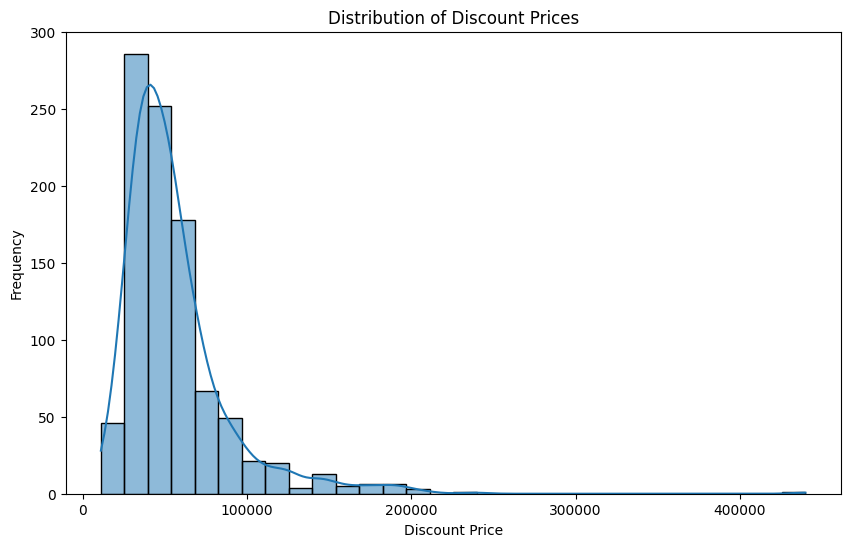

In [13]:
# Histogram for Discount Price
plt.figure(figsize=(10,6))
sns.histplot(data['Discount price'], kde=True, bins=30)
plt.title('Distribution of Discount Prices')
plt.xlabel('Discount Price')
plt.ylabel('Frequency')
plt.show()

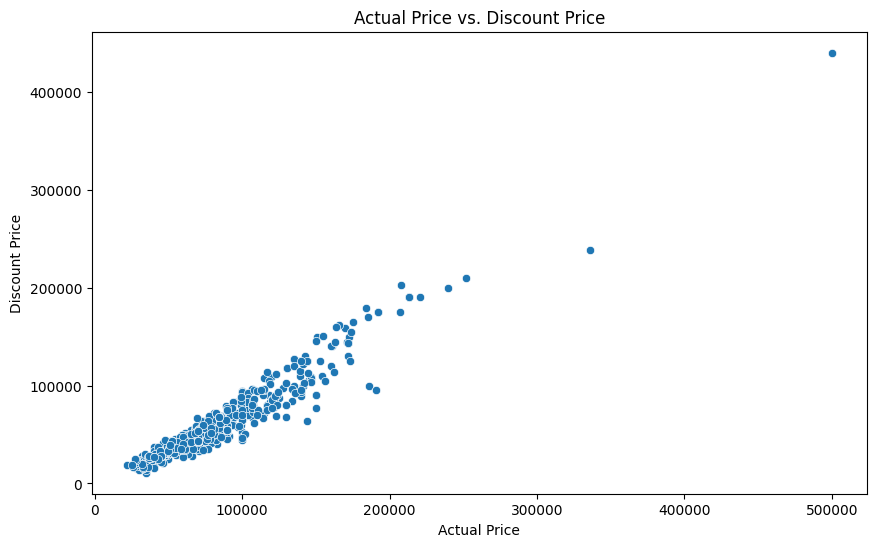

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual price', y='Discount price', data=data)
plt.title('Actual Price vs. Discount Price')
plt.xlabel('Actual Price')
plt.ylabel('Discount Price')
plt.show()

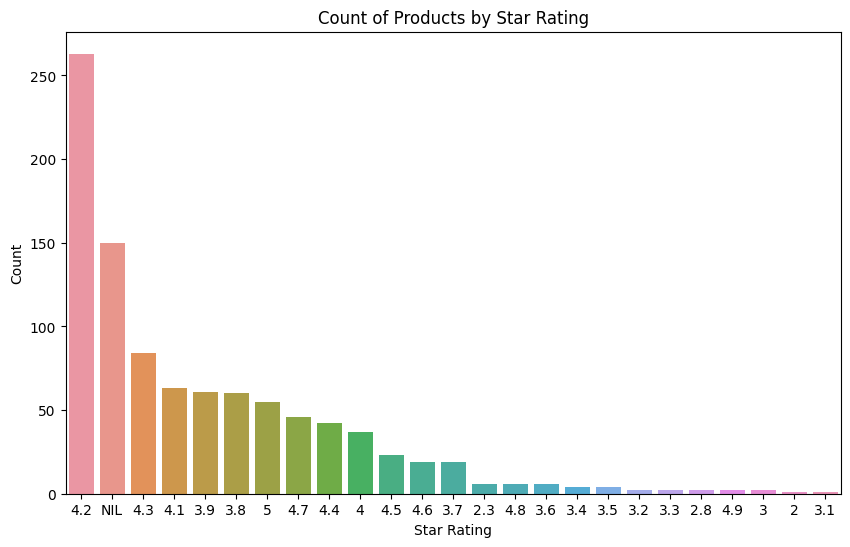

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Stars', data=data, order=data['Stars'].value_counts().index)
plt.title('Count of Products by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()


In [16]:
# Convert all entries in 'Product Name' to strings
data['Product Name'] = data['Product Name'].astype(str)
#  Extract the first word as the brand
data['Brand'] = data['Product Name'].apply(lambda x: x.split()[0])
print(data[['Product Name', 'Brand']].head())


                                        Product Name   Brand
0  MSI Cyborg 15 Intel Core i5 12th Gen 12450H - ...     MSI
1  MSI Thin 15 Intel Core i7 12th Gen 12650H - (8...     MSI
2  DELL Inspiron 3520 Intel Core i3 12th Gen 1215...    DELL
3  Acer One (2024) Intel Core i3 11th Gen 1115G4 ...    Acer
4  Lenovo V15 AMD Ryzen 3 Quad Core 7320U - (8 GB...  Lenovo


In [17]:
new_order = ['Brand', 'Rating', 'Reviews', 'Stars', 'Actual price', 'Discount price']
data = data[new_order]
data.head()

,Brand,Rating,Reviews,Stars,Actual price,Discount price
0,MSI,7 Ratings,1 Reviews,3.9,89990.0,54990.0
1,MSI,NIL,NIL,NIL,83990.0,67990.0
2,DELL,"1,805 Ratings",143 Reviews,4.2,49240.0,35660.0
3,Acer,"6,977 Ratings",596 Reviews,4.2,43999.0,26990.0
4,Lenovo,"1,263 Ratings",113 Reviews,4.2,59400.0,27989.0


In [18]:
data.dtypes

Brand              object
Rating             object
Reviews            object
Stars              object
Actual price      float64
Discount price    float64
dtype: object

In [37]:
data = pd.DataFrame(data)
# Convert 'Rating' and 'Reviews' to string if not already
data['Rating'] = data['Rating'].astype(str)
data['Reviews'] = data['Reviews'].astype(str)
# Remove ' Ratings' and ' Reviews' and commas from 'Rating' and 'Reviews' columns
data['Rating'] = data['Rating'].str.replace(' Ratings', '', regex=False).str.replace(',', '', regex=False)
data['Reviews'] = data['Reviews'].str.replace(' Reviews', '', regex=False).str.replace(',', '', regex=False)
# Convert to numeric
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')


In [24]:
data.head()

,Brand,Rating,Reviews,Stars,Actual price,Discount price
0,MSI,7.0,1,3.9,89990.0,54990.0
1,MSI,NaN,NIL,NaN,83990.0,67990.0
2,DELL,1805.0,143,4.2,49240.0,35660.0
3,Acer,6977.0,596,4.2,43999.0,26990.0
4,Lenovo,1263.0,113,4.2,59400.0,27989.0


In [26]:
data['Stars'] = pd.to_numeric(data['Stars'], errors='coerce')
data['Stars'] = data['Stars'].astype(float)

In [28]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Reviews'] = data['Reviews'].astype(float)

In [29]:
data.dtypes

Brand              object
Rating            float64
Reviews           float64
Stars             float64
Actual price      float64
Discount price    float64
dtype: object

In [30]:
unique_values = data['Brand'].unique()
print(unique_values)

['MSI' 'DELL' 'Acer' 'Lenovo' 'HP' 'ASUS' 'CHUWI' 'Thomson' 'SAMSUNG'
 'Ultimus' 'realme' 'ZEBRONICS' 'Infinix' 'Apple' 'Colorful' 'Primebook'
 'Avita' 'AXL' 'MICROSOFT' 'GIGABYTE' 'Mi' 'Vaio']


In [31]:
label_encoder = LabelEncoder()
# Fit and transform the 'Brand' column
data['Brand'] = label_encoder.fit_transform(data['Brand'])

In [32]:
data['Brand'] = data['Brand'].astype(float)

In [33]:
data.dtypes

Brand             float64
Rating            float64
Reviews           float64
Stars             float64
Actual price      float64
Discount price    float64
dtype: object

In [38]:
data = data.dropna()

In [39]:
# Features and target variable
X = data[['Brand','Rating', 'Reviews', 'Stars', 'Actual price']]
y = data['Discount price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
y_pred = model.predict(X_test)

In [43]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 3794.0949588477365


In [44]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 79096949.94204491


In [45]:
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

R^2 Score: 0.7926895294508608
